In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='HIuyPRlQtMIsjQ',
                     client_secret='PTekzmZjerluEHt53qnTQgCyINA',
                     user_agent='spfa8301')

In [3]:
headlines = set()


In [5]:
for submission in reddit.subreddit('TheLastJedi').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

790


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fairbairnsj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Spoilers: The fusion of two Mark Hamill characters',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'Why? (Spoilers)', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Quick question about who gets to use the Force...',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [9]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Spoilers: The fusion of two Mark Hamill charac...,0.000,1.000,0.000
1,0.0000,Why? (Spoilers),0.000,1.000,0.000
2,0.0000,Quick question about who gets to use the Force...,0.000,1.000,0.000
3,0.0516,I liked it for the reason everyone seems to di...,0.181,0.625,0.194
4,0.0000,SPOILERS The Last Bridge,0.000,1.000,0.000


In [10]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Spoilers: The fusion of two Mark Hamill charac...,0.000,1.000,0.000,0
1,0.0000,Why? (Spoilers),0.000,1.000,0.000,0
2,0.0000,Quick question about who gets to use the Force...,0.000,1.000,0.000,0
3,0.0516,I liked it for the reason everyone seems to di...,0.181,0.625,0.194,0
4,0.0000,SPOILERS The Last Bridge,0.000,1.000,0.000,0


In [11]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [12]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['SPOILER ALERT: Relates to Han Solo',
 "Why Rose's Kissed Worked",
 'Pretty bummed out..',
 'Anyone else think that snoke is dressed like a pimp?',
 'New NEON podcast on The Last Jedi which draws some interesting parallels with history.']

Negative headlines:

['Is no one going to talk about the Yoda scene?',
 '[Spoilers] Reaction to death in the SWU',
 'Why Kylo Ren’s Mask is Destroyed - Star Wars Theory',
 'Am I crazy, or is this the first movie they call it "light speed" instead of "hyperspace"?',
 'To the Rey haters - are you aware how Anakin was conceived?']


In [13]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    460
-1    197
 1    133
Name: label, dtype: int64
 0    58.227848
-1    24.936709
 1    16.835443
Name: label, dtype: float64


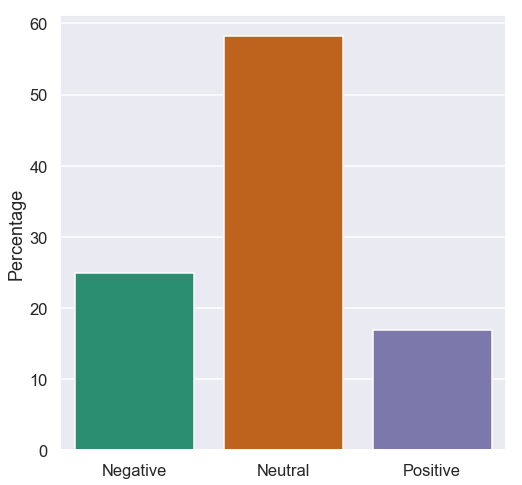

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [15]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [16]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [17]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [18]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [19]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('spoilers', 28),
 ('last', 22),
 ('jedi', 21),
 ('tlj', 16),
 ('movie', 13),
 ('spoiler', 11),
 ('anyone', 10),
 ('think', 9),
 ('like', 9),
 ('loved', 9),
 ('rey', 9),
 ('great', 8),
 ('love', 7),
 ('liked', 7),
 ('want', 7),
 ('luke', 7),
 ('pretty', 6),
 ('scene', 6),
 ('one', 6),
 ('kylo', 6)]

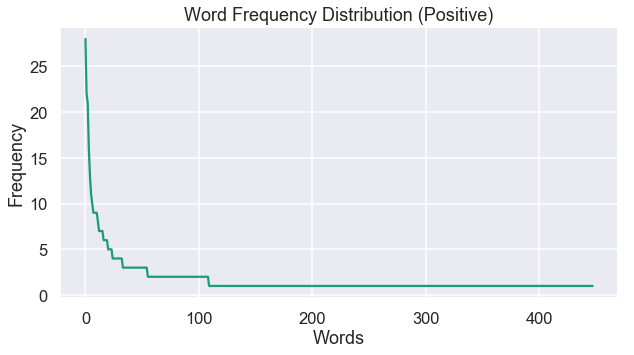

In [20]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

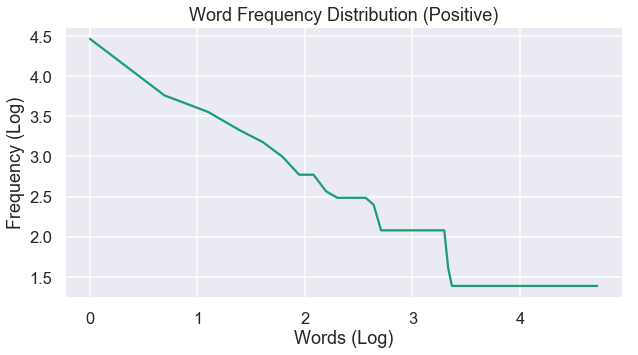

In [21]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [22]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('wars', 64),
 ('star', 61),
 ('jedi', 57),
 ('last', 54),
 ('spoilers', 39),
 ('movie', 25),
 ('tlj', 16),
 ('spoiler', 15),
 ('rey', 13),
 ('kylo', 11),
 ('luke', 11),
 ('ren', 10),
 ('new', 10),
 ('people', 10),
 ('force', 8),
 ('hate', 8),
 ('really', 8),
 ('like', 8),
 ('review', 7),
 ('problem', 7)]

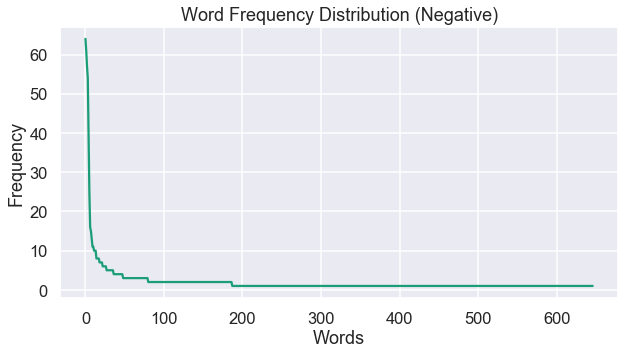

In [23]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

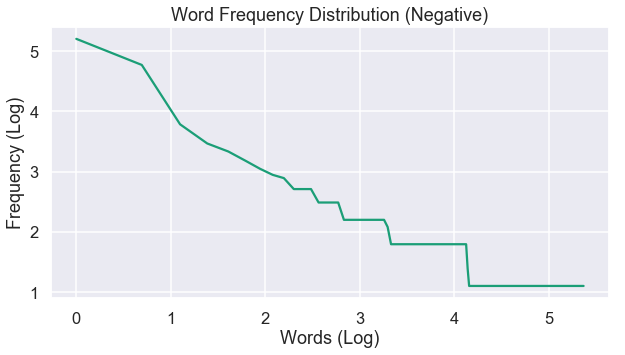

In [24]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()